## Hierarchical clustering of modalities

In [1]:
%load_ext autoreload
%autoreload 2

import modish
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

sns.set(style='ticks', context='talk', rc={'font.sans-serif':'Arial', 'pdf.fonttype': 42})

%matplotlib inline



import flotilla

study = flotilla.embark('singlecell_pnm_figure2_modalities')

not_outliers = study.splicing.singles.index.difference(study.splicing.outliers.index)

/home/obotvinnik/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:784: UserWarning: Found matplotlib configuration in ~/.matplotlib/. To conform with the XDG base directory standard, this configuration location has been deprecated on Linux, and the new location is now /home/obotvinnik/.config/matplotlib/. Please move your configuration there to ensure that matplotlib will continue to find it in the future.
  _get_xdg_config_dir())
/home/obotvinnik/anaconda/lib/python2.7/site-packages/pandas/io/parsers.py:1170: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


2015-10-20 10:26:17	Reading datapackage from /home/obotvinnik/flotilla_projects/singlecell_pnm_figure2_modalities/datapackage.json
2015-10-20 10:26:17	Parsing datapackage to create a Study object
2015-10-20 10:27:03	Initializing Study
2015-10-20 10:27:03	Initializing Predictor configuration manager for Study
2015-10-20 10:27:03	Predictor ExtraTreesClassifier is of type <class 'sklearn.ensemble.forest.ExtraTreesClassifier'>
2015-10-20 10:27:03	Added ExtraTreesClassifier to default predictors
2015-10-20 10:27:03	Predictor ExtraTreesRegressor is of type <class 'sklearn.ensemble.forest.ExtraTreesRegressor'>
2015-10-20 10:27:03	Added ExtraTreesRegressor to default predictors
2015-10-20 10:27:03	Predictor GradientBoostingClassifier is of type <class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'>
2015-10-20 10:27:03	Added GradientBoostingClassifier to default predictors
2015-10-20 10:27:03	Predictor GradientBoostingRegressor is of type <class 'sklearn.ensemble.gradient_boost

In [2]:
splicing_singles_no_outliers = study.splicing.singles.ix[not_outliers]


In [3]:
splicing_feature_data = pd.read_csv('/projects/ps-yeolab/obotvinnik/singlecell_pnms/splicing_feature_data.csv', 
                                          index_col=0)
print splicing_feature_data.shape
splicing_feature_data.head()

(33693, 58)


/home/obotvinnik/anaconda/lib/python2.7/site-packages/pandas/io/parsers.py:1170: DtypeWarning: Columns (11,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


,criteria,criteria_additional,criteria_full,ensembl_id,exon1,exon1_length,exon2,exon2_length,exon3,exon3_length,...,isoform2_protein_secondary_structure_turn,isoform1_aromaticity,isoform2_aromaticity,isoform1_iupred_score,isoform2_iupred_score,exon2_splice_site_3p_score,exon2_splice_site_3p_seq,exon2_splice_site_5p_score,exon2_splice_site_5p_seq,exon2_phastcons_placental_mammal
event_id,,,,,,,,,,,,,,,,,,,,,
exon:chr10:100190328-100190427:-@exon:chr10:100189548-100189646:-@exon:chr10:100189330-100189399:-,best,appris_principal,"best,appris_principal",ENSG00000107521,exon:chr10:100190328-100190427:-,100,exon:chr10:100189548-100189646:-,99,exon:chr10:100189330-100189399:-,70,...,0.370787,NaN,0.056180,NaN,0.638962,7.77,CTCTCCCCTGCCCTGCACAGCCT,6.96,ACGGTGTGT,0.291112
exon:chr10:100193697-100193848:-@exon:chr10:100190888-100191048:-@exon:chr10:100190328-100190427:-,only one,NaN,only one,ENSG00000107521,exon:chr10:100193697-100193848:-,152,exon:chr10:100190888-100191048:-,161,exon:chr10:100190328-100190427:-,100,...,NaN,NaN,NaN,NaN,NaN,9.08,TCCCTTCCTGCCCTGGCTAGGCC,7.96,TAGGTGAGC,0.803519
exon:chr10:100195392-100195529:-@exon:chr10:100195029-100195171:-@exon:chr10:100193697-100193848:-,best,appris_principal,"best,appris_principal",ENSG00000107521,exon:chr10:100195392-100195529:-,138,exon:chr10:100195029-100195171:-,143,exon:chr10:100193697-100193848:-,152,...,NaN,NaN,NaN,NaN,NaN,7.92,TGGCCTGCCTGTGCCTGCAGTTT,6.05,GGAGTGAGT,0.839394
exon:chr10:101165513-101165617:-@exon:chr10:101163481-101163631:-@exon:chr10:101163226-101163391:-,only one,NaN,only one,ENSG00000120053,exon:chr10:101165513-101165617:-,105,exon:chr10:101163481-101163631:-,151,exon:chr10:101163226-101163391:-,166,...,0.264286,NaN,0.135714,NaN,0.223048,10.79,CTCACTTTGCTTCCCCGCAGCAC,8.34,ACAGTGAGT,0.978780
exon:chr10:101419263-101419345:+@exon:chr10:101419619-101419721:+@exon:chr10:101421203-101421385:+,only one,NaN,only one,ENSG00000198018,exon:chr10:101419263-101419345:+,83,exon:chr10:101419619-101419721:+,103,exon:chr10:101421203-101421385:+,183,...,NaN,NaN,NaN,NaN,NaN,5.04,CTGAAATCAAATCTTTCTAGGCT,9.31,TAGGTAAGG,0.934804


In [4]:
join_cols = study.expression.feature_data.columns.difference(splicing_feature_data.columns)

study.splicing.feature_data = splicing_feature_data.join(study.expression.feature_data[join_cols], on='one_ensembl_id')
study.splicing.feature_data.head()

,criteria,criteria_additional,criteria_full,ensembl_id,exon1,exon1_length,exon2,exon2_length,exon3,exon3_length,...,rbp,ribosomal,ribosomal_subunit,synapse,tag,transcript_id,transcript_name,transcript_status,transcript_type,transcription_factor
event_id,,,,,,,,,,,,,,,,,,,,,
exon:chr10:100190328-100190427:-@exon:chr10:100189548-100189646:-@exon:chr10:100189330-100189399:-,best,appris_principal,"best,appris_principal",ENSG00000107521,exon:chr10:100190328-100190427:-,100,exon:chr10:100189548-100189646:-,99,exon:chr10:100189330-100189399:-,70,...,False,False,False,False,ncRNA_host,ENSG00000107521.14,HPS1,KNOWN,protein_coding,False
exon:chr10:100193697-100193848:-@exon:chr10:100190888-100191048:-@exon:chr10:100190328-100190427:-,only one,NaN,only one,ENSG00000107521,exon:chr10:100193697-100193848:-,152,exon:chr10:100190888-100191048:-,161,exon:chr10:100190328-100190427:-,100,...,False,False,False,False,ncRNA_host,ENSG00000107521.14,HPS1,KNOWN,protein_coding,False
exon:chr10:100195392-100195529:-@exon:chr10:100195029-100195171:-@exon:chr10:100193697-100193848:-,best,appris_principal,"best,appris_principal",ENSG00000107521,exon:chr10:100195392-100195529:-,138,exon:chr10:100195029-100195171:-,143,exon:chr10:100193697-100193848:-,152,...,False,False,False,False,ncRNA_host,ENSG00000107521.14,HPS1,KNOWN,protein_coding,False
exon:chr10:101165513-101165617:-@exon:chr10:101163481-101163631:-@exon:chr10:101163226-101163391:-,only one,NaN,only one,ENSG00000120053,exon:chr10:101165513-101165617:-,105,exon:chr10:101163481-101163631:-,151,exon:chr10:101163226-101163391:-,166,...,False,False,False,False,NaN,ENSG00000120053.9,GOT1,KNOWN,protein_coding,False
exon:chr10:101419263-101419345:+@exon:chr10:101419619-101419721:+@exon:chr10:101421203-101421385:+,only one,NaN,only one,ENSG00000198018,exon:chr10:101419263-101419345:+,83,exon:chr10:101419619-101419721:+,103,exon:chr10:101421203-101421385:+,183,...,False,False,False,False,NaN,ENSG00000198018.6,ENTPD7,KNOWN,protein_coding,False


### Cluster events that are bimodal in all - does it partition the celltypes?

In [5]:
same_modality_all_celltypes = study.supplemental.modalities_tidy.groupby(['event_name', 'modality']).filter(lambda x: len(x) == 3)
print same_modality_all_celltypes.shape
same_modality_all_celltypes.head()
bimodal_all = same_modality_all_celltypes.event_name[same_modality_all_celltypes.modality == 'bimodal'].unique()
psi_subset = splicing_singles_no_outliers.ix[:, bimodal_all].dropna(thresh=splicing_singles_no_outliers.shape[0]*0.5, axis=1)
print psi_subset.shape

row_colors = study.sample_id_to_color[psi_subset.index]

mask = psi_subset.isnull()
psi_subset = psi_subset.fillna(0.5)
xticklabels = study.splicing.feature_data.gene_name[psi_subset.columns]
psi_ordering_scores = psi_subset.apply(flotilla.compute.splicing.switchy_score)
psi_ordering_scores.sort()

# psi_subset = psi_subset.ix[:, psi_ordering_scores.index]

(5874, 4)
(181, 49)


In [6]:
same_modality_all_celltypes.groupby(['modality']).size()/3

modality
bimodal      63
~0          479
~1         1416
dtype: float64

In [9]:
folder = '.'

In [10]:
# # non-outlier single cells and pooled
# sample_ids = psi_filtered.index.tolist() + study.splicing.pooled.index.tolist()

# for (event_name, modality), df in same_modality_all_celltypes.groupby(['event_name', 'modality']):
#     if modality in ('~0', '~1'):
#         continue
    
#     gene_name = study.splicing.feature_data.gene_name[event_name]
#     gene_id = study.expression.data.columns.intersection(study.splicing.feature_data.ensembl_id[event_name].split(','))[0]
#     print gene_name, event_name, modality

#     fig, axes = plt.subplots(figsize=(8, 4), ncols=2)    
#     study.splicing._violinplot(event_name, phenotype_groupby=study.sample_id_to_phenotype,
#                                sample_ids=sample_ids,
#                               phenotype_order=study.phenotype_order, ax=axes[0], color=study.phenotype_color_ordered,
#                               bw=0.2, ylim=(0, 1), yticks=(0, 0.5, 1), ylabel='$\Psi$')
#     study.expression._violinplot(gene_id, phenotype_groupby=study.sample_id_to_phenotype,
#                                sample_ids=sample_ids,
#                               phenotype_order=study.phenotype_order, ax=axes[1], color=study.phenotype_color_ordered,)
#     sns.despine()
#     fig.tight_layout()
#     fig.savefig('{}/same_modality_all_celltypes_{}_{}_{}.pdf'.format(folder, modality, gene_name, event_name))


NameError: name 'phenotype' is not defined

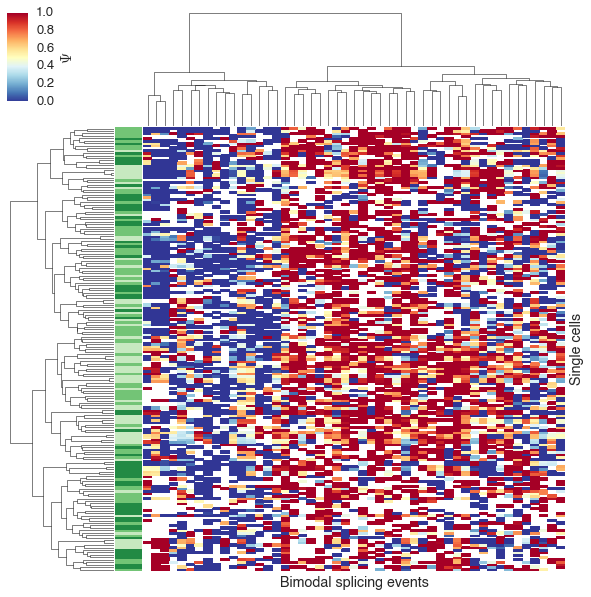

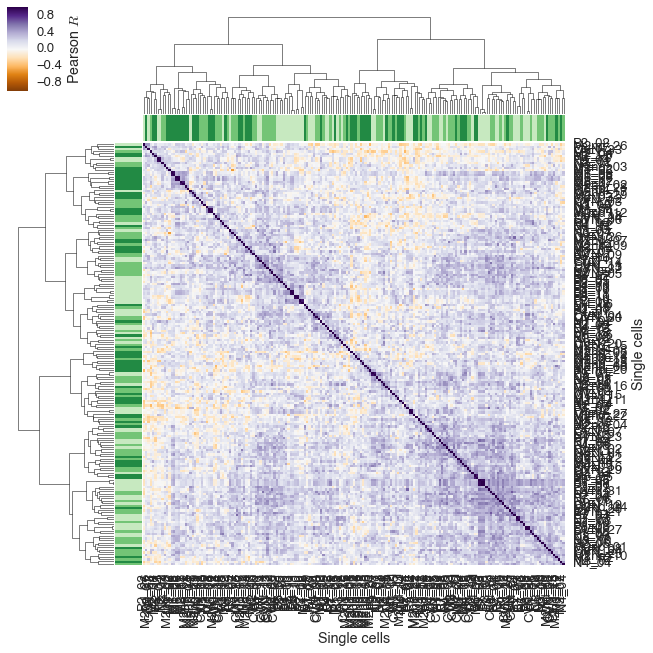

In [11]:
sample_colors = study.sample_id_to_color[psi_subset.index]

g = sns.clustermap(psi_subset, mask=mask, metric='euclidean', cmap='RdYlBu_r', center=0.5, 
#                    col_cluster=False,
                   cbar_kws=dict(label='$\Psi$'), method='ward', xticklabels=xticklabels, row_colors=sample_colors)
g.ax_heatmap.set(xticks=[], yticks=[], xlabel='Bimodal splicing events', ylabel='Single cells')
g.savefig('{}/bimodal_all_celltypes_clustergrid.pdf'.format(folder))

g = sns.clustermap(psi_subset.T.corr().dropna(how='all', axis=1).dropna(how='all', axis=0), 
                   metric='euclidean', cmap='PuOr', center=0,  col_colors=sample_colors, row_colors=sample_colors,
                   cbar_kws=dict(label='Pearson $R$'), method='ward')
g.ax_heatmap.set(xlabel='Single cells', ylabel='Single cells')
g.savefig('{}/bimodal_all_celltypes_samples_correlated_clustergrid.pdf'.format(folder))

g = sns.clustermap(psi_subset.corr().dropna(how='all', axis=1).dropna(how='all', axis=0), 
                   metric='euclidean', cmap='PuOr', center=0, 
                   cbar_kws=dict(label='Pearson $R$'), method='ward', xticklabels=xticklabels,
                  yticklabels=xticklabels)
g.ax_heatmap.set(xlabel='Bimodal splicing events', ylabel='Bimodal splicing events', xticks=[], yticks=[])
g.savefig('{}/bimodal_all_celltypes_events_correlated_clustergrid.pdf'.format(folder,))

### Bimodal TFs

(100,)


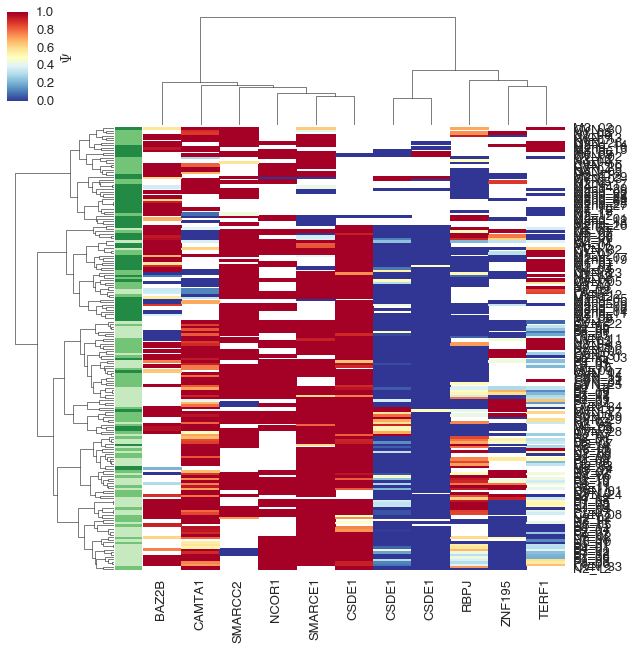

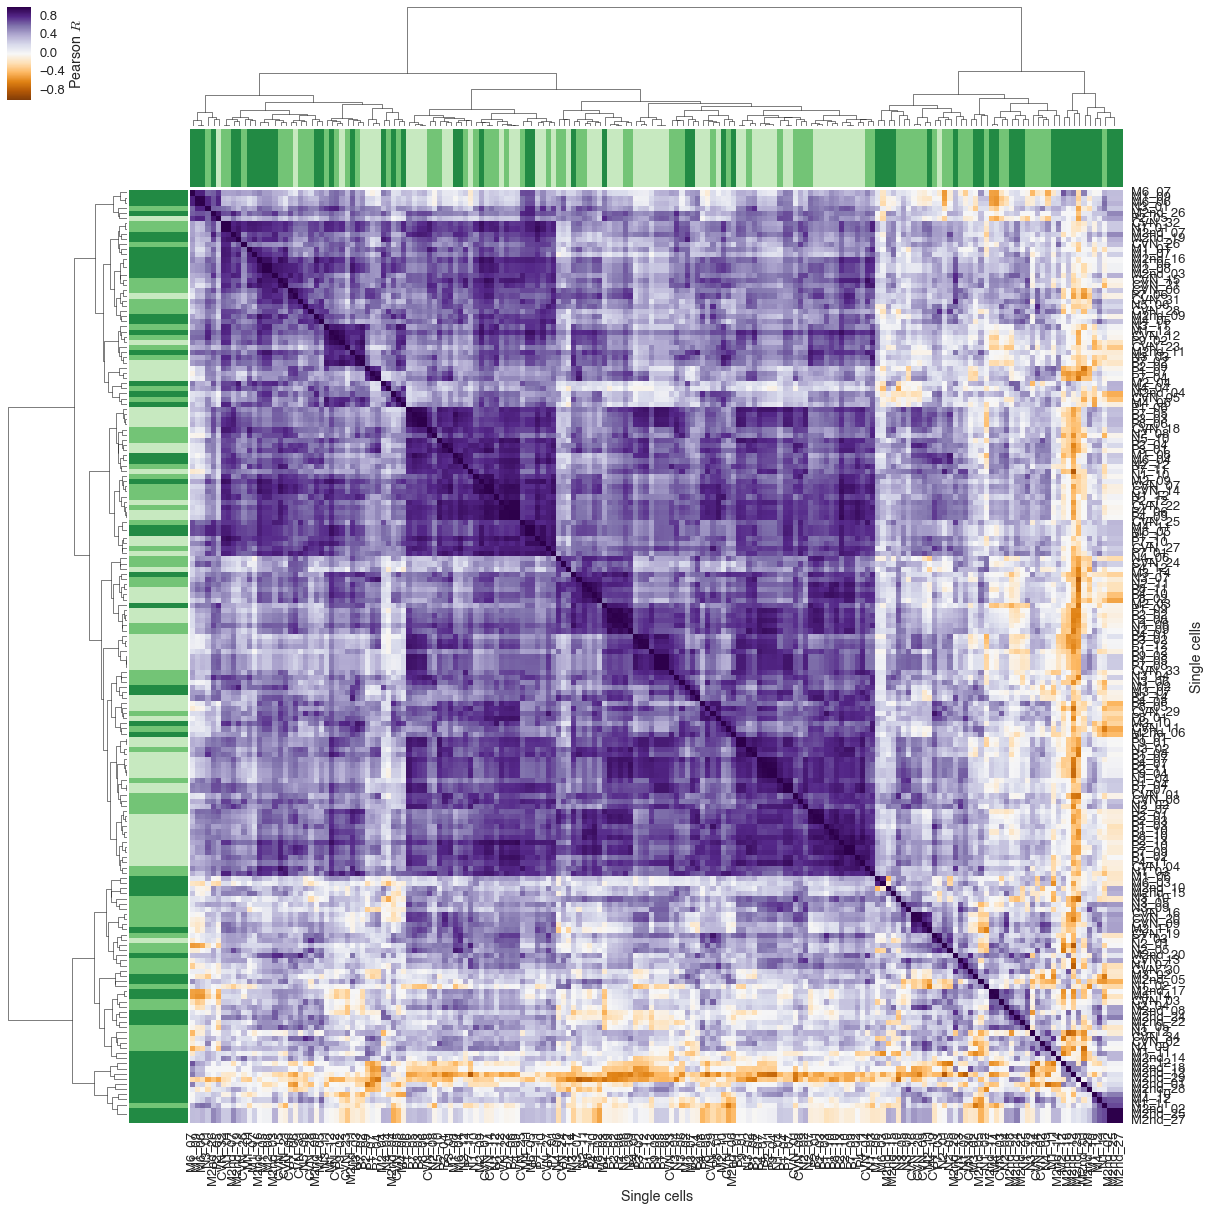

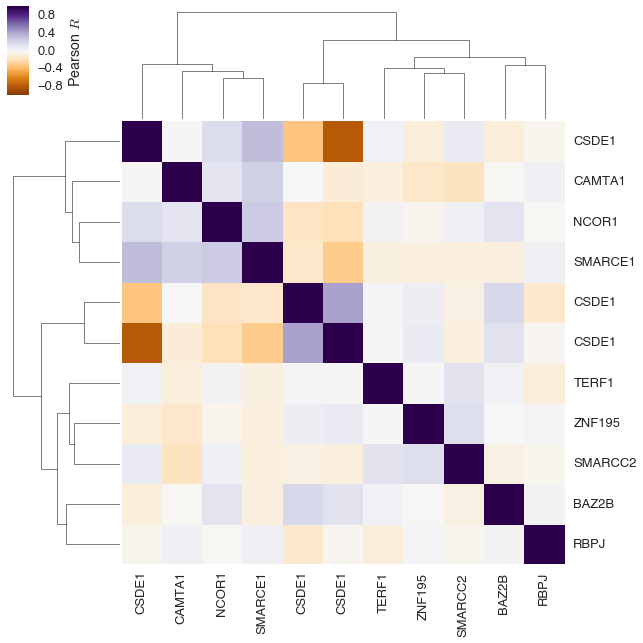

In [13]:
bimodal = study.supplemental.modalities_tidy.loc[study.supplemental.modalities_tidy.modality == 'bimodal']
bimodal = bimodal.join(study.splicing.feature_data, on='event_name')
bimodal_tfs = bimodal.loc[bimodal['bioguo_animaltfdb_tf'].fillna(False)]
bimodal_tf_events = bimodal_tfs.event_name.unique()
print bimodal_tf_events.shape

psi_bimodal_tfs = splicing_singles_no_outliers.ix[:, bimodal_tf_events].dropna(
    thresh=splicing_singles_no_outliers.shape[0]*0.5, axis=1)

sample_colors = study.sample_id_to_color[psi_bimodal_tfs.index]

mask = psi_bimodal_tfs.isnull()
psi_bimodal_tfs = psi_bimodal_tfs.fillna(0.5)
xticklabels = study.splicing.feature_data.gene_name[psi_bimodal_tfs.columns]


splicing_label = 'Bimodal splicing events in TFs'

g = sns.clustermap(psi_bimodal_tfs, mask=mask, metric='euclidean', cmap='RdYlBu_r', center=0.5, 
                   cbar_kws=dict(label='$\Psi$'), method='ward', xticklabels=xticklabels, row_colors=sample_colors)
# g.ax_heatmap.set(xticks=[], yticks=[], xlabel=splicing_label, ylabel='Single cells')
g.savefig('{}/bimodal_tfs_celltypes_clustergrid.pdf'.format(folder))

g = sns.clustermap(psi_bimodal_tfs.T.corr().dropna(how='all', axis=1).dropna(how='all', axis=0), 
                   metric='euclidean', cmap='PuOr', center=0, figsize=(20, 20),
                   cbar_kws=dict(label='Pearson $R$'), method='ward', col_colors=sample_colors, row_colors=sample_colors)
g.ax_heatmap.set(xlabel='Single cells', ylabel='Single cells')
g.savefig('{}/bimodal_tfs_celltypes_samples_correlated_clustergrid.pdf'.format(folder))

g = sns.clustermap(psi_bimodal_tfs.corr().dropna(how='all', axis=1).dropna(how='all', axis=0), 
                   metric='euclidean', cmap='PuOr', center=0, 
                   cbar_kws=dict(label='Pearson $R$'), method='ward', xticklabels=xticklabels,
                  yticklabels=xticklabels)
# g.ax_heatmap.set(xlabel=splicing_label, ylabel=splicing_label, xticks=[], yticks=[])
g.savefig('{}/bimodal_tfs_celltypes_events_correlated_clustergrid.pdf'.format(folder))

### Bimodal RBPs which bind mRNA

(236,)


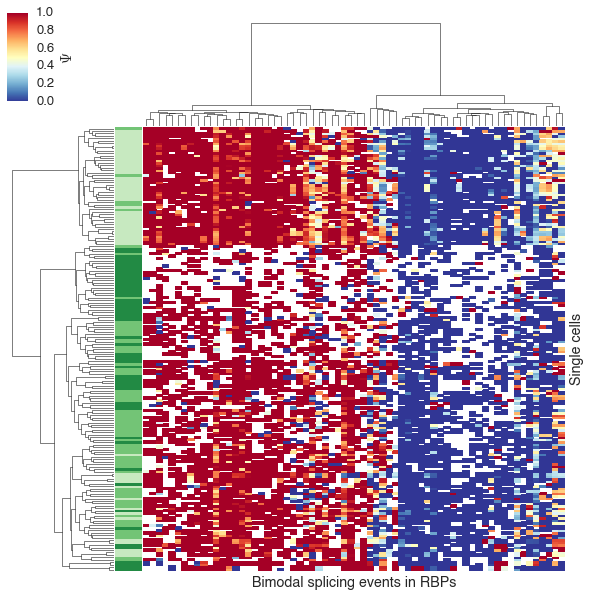

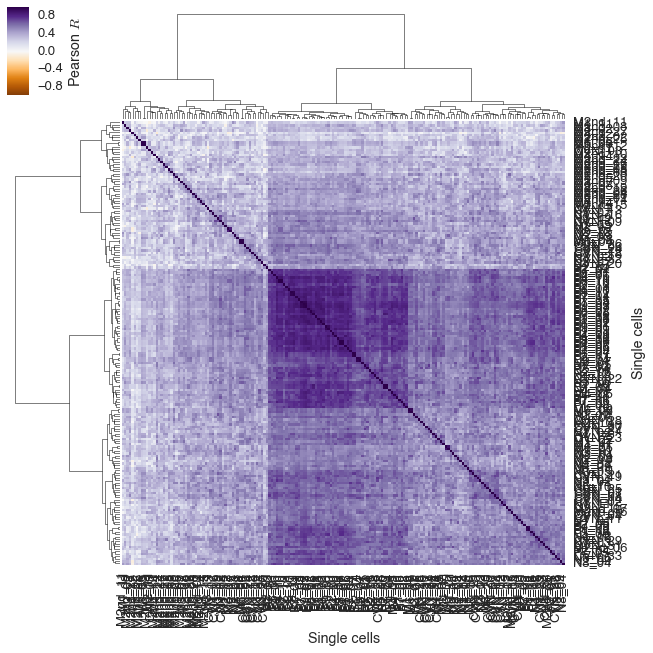

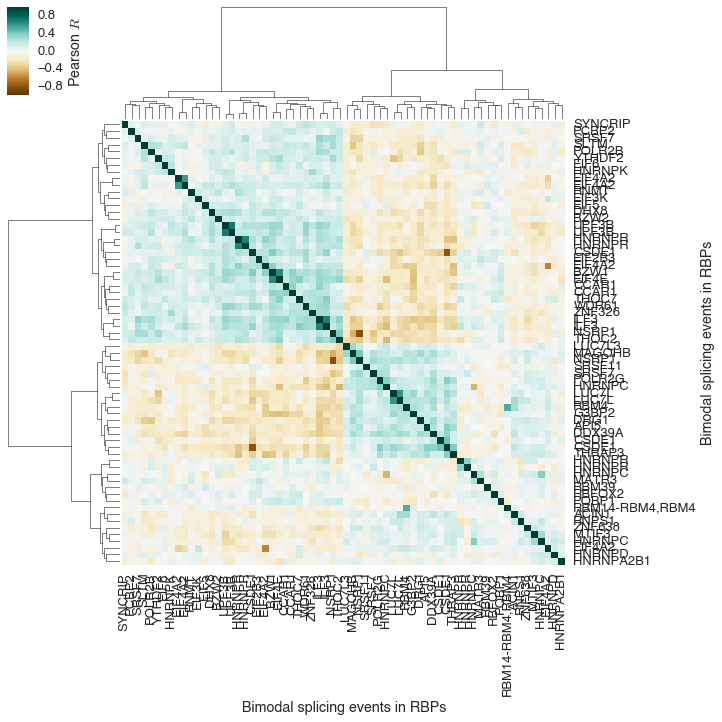

In [15]:
bimodal = study.supplemental.modalities_tidy.loc[study.supplemental.modalities_tidy.modality == 'bimodal']
bimodal = bimodal.join(study.splicing.feature_data, on='event_name')
bimodal_tfs = bimodal.loc[bimodal['gerstberger2014_rbp_target_mrna']]
bimodal_tf_events = bimodal_tfs.event_name.unique()
print bimodal_tf_events.shape

psi_bimodal_tfs = splicing_singles_no_outliers.ix[:, bimodal_tf_events].dropna(
    thresh=splicing_singles_no_outliers.shape[0]*0.5, axis=1)

row_colors = study.sample_id_to_color[psi_bimodal_tfs.index]

mask = psi_bimodal_tfs.isnull()
psi_bimodal_tfs = psi_bimodal_tfs.fillna(0.5)
xticklabels = study.splicing.feature_data.gene_name[psi_bimodal_tfs.columns]


splicing_label = 'Bimodal splicing events in RBPs'

g = sns.clustermap(psi_bimodal_tfs, mask=mask, metric='euclidean', cmap='RdYlBu_r', center=0.5, 
#                    col_cluster=False,
                   cbar_kws=dict(label='$\Psi$'), method='ward', xticklabels=xticklabels, row_colors=row_colors)
g.ax_heatmap.set(xticks=[], yticks=[], xlabel=splicing_label, ylabel='Single cells')
g.savefig('{}/bimodal_rbps_celltypes_clustergrid.pdf'.format(folder))

g = sns.clustermap(psi_bimodal_tfs.T.corr().dropna(how='all', axis=1).dropna(how='all', axis=0), 
                   metric='euclidean', cmap='PuOr', center=0, 
                   cbar_kws=dict(label='Pearson $R$'), method='ward')
g.ax_heatmap.set(xlabel='Single cells', ylabel='Single cells')
g.savefig('{}/bimodal_rbps_celltypes_samples_correlated_clustergrid.pdf'.format(folder))

g = sns.clustermap(psi_bimodal_tfs.corr().dropna(how='all', axis=1).dropna(how='all', axis=0), 
                   metric='euclidean', cmap='BrBG', center=0, 
                   cbar_kws=dict(label='Pearson $R$'), method='ward', xticklabels=xticklabels,
                  yticklabels=xticklabels)
g.ax_heatmap.set(xlabel=splicing_label, ylabel=splicing_label)
g.savefig('{}/bimodal_rbps_celltypes_events_correlated_clustergrid.pdf'.format(folder))

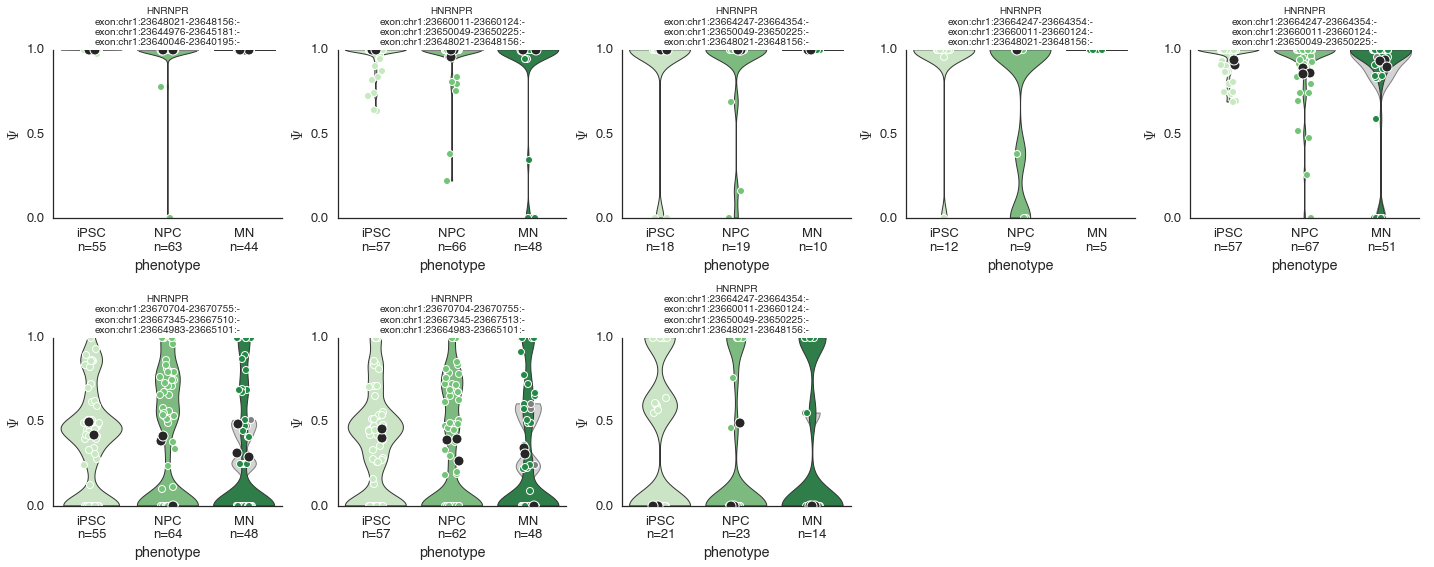

In [16]:
study.plot_event('HNRNPR')

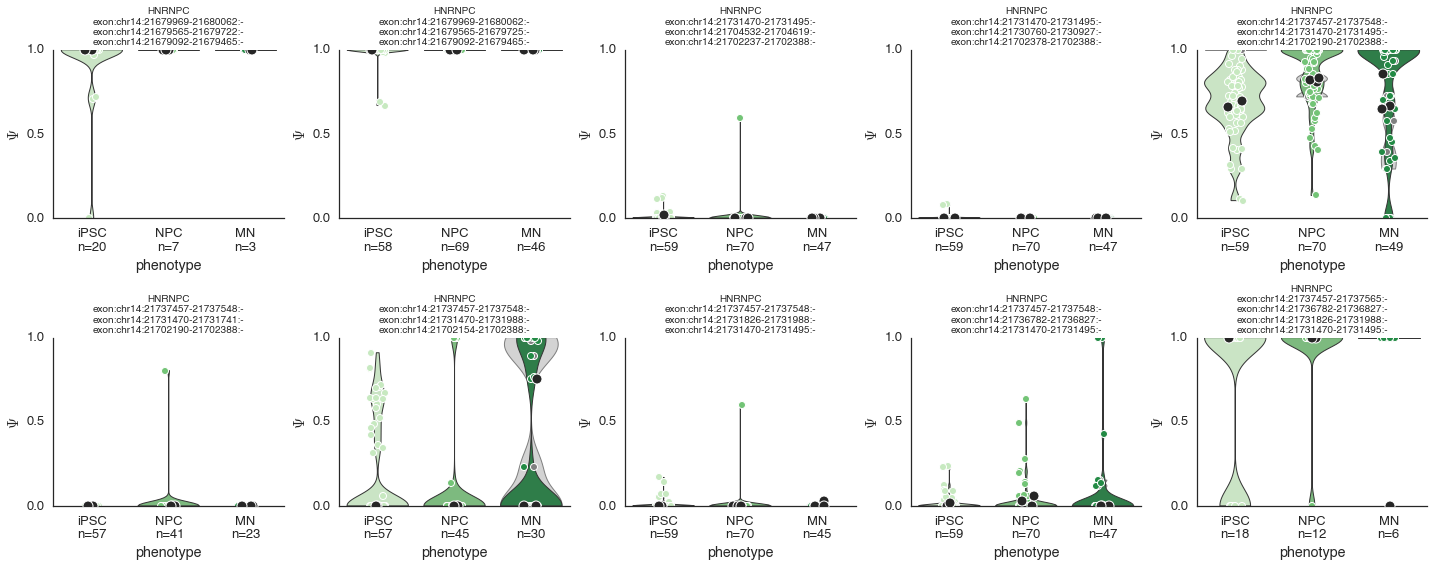

In [17]:
study.plot_event("HNRNPC")

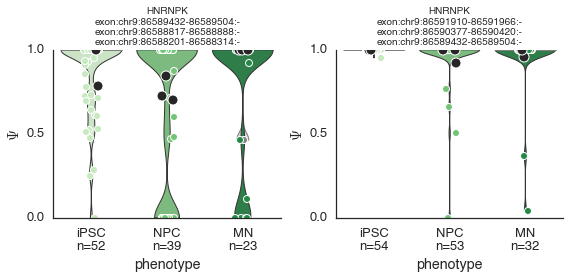

In [19]:
study.plot_event('HNRNPK')

In [ ]:
psi_grouped = splicing_singles_no_outliers.groupby(study.sample_id_to_phenotype)

for phenotype, df in study.supplemental.modalities_tidy.groupby('phenotype'):
    print phenotype
    bimodal_events = df.event_name[df.modality == 'bimodal']
    psi_subset = psi_grouped.get_group(phenotype)
    print '\t', psi_subset.shape
    thresh = int(psi_subset.shape[0]*0.5)
    psi_subset = psi_subset.ix[:, bimodal_events].dropna(thresh=thresh, axis=1)
    print '\t', psi_subset.shape
    mask = psi_subset.isnull()
    psi_subset = psi_subset.fillna(0.5)
    xticklabels = study.splicing.feature_data.gene_name[psi_subset.columns]
    g = sns.clustermap(psi_subset, mask=mask, metric='euclidean', cmap='RdYlBu_r', center=0.5, 
                       cbar_kws=dict(label='$\Psi$'), method='ward', xticklabels=xticklabels)
    g.ax_heatmap.set(xticks=[], yticks=[], xlabel='Splicing events', ylabel='Single cells')
    g.savefig('{}/bimodal_{}_clustergrid.pdf'.format(folder, phenotype))
    
    
    g = sns.clustermap(psi_subset.T.corr(), metric='euclidean', cmap='PRGn', center=0, 
                       cbar_kws=dict(label='Pearson $R$'), method='ward')
    g.ax_heatmap.set(xlabel='Single cells', ylabel='Single cells', xticks=[], yticks=[])
    g.savefig('{}/bimodal_{}_samples_correlated_clustergrid.pdf'.format(folder, phenotype))

    g = sns.clustermap(psi_subset.corr(), metric='euclidean', cmap='PRGn', center=0, 
                       cbar_kws=dict(label='Pearson $R$'), method='ward', xticklabels=xticklabels,
                      yticklabels=xticklabels)
    g.ax_heatmap.set(xticks=[], yticks=[], xlabel='Splicing events', ylabel='Splicing events')
    g.savefig('{}/bimodal_{}_events_correlated_clustergrid.pdf'.format(folder, phenotype))

In [ ]:
psi_grouped = splicing_singles_no_outliers.groupby(study.sample_id_to_phenotype)

for (phenotype, modality),  df in study.supplemental.modalities_tidy.groupby(['phenotype', 'modality']):
    print phenotype, modality
#     bimodal_events = df.event_name[df.modality == 'ambiguous']
    psi_subset = psi_grouped.get_group(phenotype)
#     sns.distplot(psi_subset.var().dropna(), label=phenotype)
    
#     psi_subset = psi_subset.ix[:, psi_subset.var() > 0.1]
    
    print '\t', psi_subset.shape
#     thresh = int(psi_subset.shape[0]*0.5)
    thresh = 20
    psi_subset = psi_subset.ix[:, df.event_name].dropna(thresh=thresh, axis=1)
    print '\t', psi_subset.shape
    mask = psi_subset.isnull()
    psi_subset = psi_subset.fillna(0.5)
#     xticklabels = study.splicing.feature_data.gene_name[psi_subset.columns]
    g = sns.clustermap(psi_subset, mask=mask, metric='euclidean', cmap='RdYlBu_r', center=0.5, 
                       cbar_kws=dict(label='$\Psi$'), method='ward', )
    g.ax_heatmap.set(xticks=[], yticks=[], xlabel='Splicing events', ylabel='Single cells')

    g.savefig('{}/{}_{}_clustergrid.pdf'.format(folder, modality, phenotype))
#     g.ax_heatmap.set(xticks=[], yticks=[])
#     g.cax.set(ticks=(0, 0.5, 1))